In [10]:
import numpy as np
from numpy import cos, sqrt, pi, exp
from numpy import trapz as Int
import matplotlib.pyplot as plt

In [23]:

def NeumanDirichlet(y, df_dy, k, H, M):

    dfn = np.zeros(M, dtype=np.complex128)
    dfn[0] = Int( df_dy*1/sqrt(2*H), y )
    for n in range(1,M):
        dfn[n] = Int( df_dy*cos(n*pi*y/H)/sqrt(H), y )
    
    f_y = 1/(1j*k)*dfn[0]/sqrt(2*H)*np.ones_like(y) + sum([ 1/(1j*sqrt(k**2 - (n*pi/H)**2))*dfn[n]*cos(n*pi*y/H)/sqrt(H) for n in range(1,M)])
    return f_y

In [32]:
H = 1 
R = 10

N = 100
x = np.linspace(-R,R,N)
y = np.linspace(-H,H,N)
X, Y = np.meshgrid(x,y)
k = 8
beta = lambda n : sqrt(k**2 - (n*pi/H)**2)
n = 2
f = exp(1j*beta(n)*X)*cos(n*pi*Y/H)
L_or_R = -1
grad_f = L_or_R*1j*beta(n)*exp(1j*beta(n)*X)*cos(n*pi*Y/H)
f_y = NeumanDirichlet(y,grad_f[:,0],k=k,H=H,M=3)

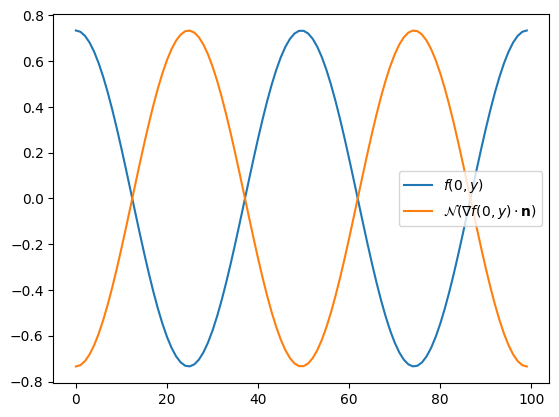

In [33]:
plt.plot(np.real(f[:,0]),label='$f(0,y)$')
plt.plot(np.real(f_y),label='$\\mathcal{N}(\\nabla f(0,y)\\cdot \\mathbf{n})$')
plt.legend()
